#NAME: ANUJ SHEKHAWAT
#STUDENT NUMBER :20248394

*   In this Assignment I used Logistic Regression to predict the popularity of music record.

# REPORT SUMMARY.

STEPS PERFORMED :- 
1)   I perfomed Basic EDA to understand my Data.


---


2)   I perfomed basic Data Cleaning before running my logistic regression model. such as checking duplicates, NA's, dropping irrelevant columns.


---



3)  I stored my target variable in Y and all other features in X.


---



4)  Then I split my Test and Train Data with 75% Train and 25% TEST.


---


5) Created one common method print_score to print accuracy, confusion matix and classification report of my models.


---


6) Run Logistic regression model with NO regularization. Which gave me 
85.78% accuracy in Train Data and 86.39% in Test Data.


---


7) Then I generated the ROC curve of my Logistic model which gave value of 0.57.


---


8) In this step I transformed my Data using Scaling, PCA and saved them in X_train and X_test.


---


9) Run the logistic model with both L1 and L2 regularization. And I found L2 is slightly better so I decided to make L2 regularization one as my final model on my tranformed data.


---


10) Run the print_score method with my new logistic model.And found my Train data accuracy got improved to 97.40% and my test Data accuracy to 
91.40%.


---


10) Generated ROC curve again and this time value of ROC improved to 0.74.



---

11) Implemented RFE technique to check model performance. 


---



12) Selected 200 features for RFE technique and saved the data for logistic regression Model.


---



13) Run the logistic regression model again with RFE data and and L2 regularization.



---


14) Test my model and got 89% accuracy on Test data. which is slightly less than without RFE model. 




---


15) Used logit model to print all the Coeficients of the features.


---



16) Selected 5 features for coeficient analysis whose P value are less than 0.05. Because I assumed all the features having P value greater than 0.05 does not belong to the model.

















#BRIEF

In this project I used logistic regression to predict the popularity of music record. I started with basic EDA to understand my data points first then I deep to make my data ready for running Logistic regression since Logistic doesn't run on categorical data types. 

After that I build logistic regression model using all my variables which gave me 85.78% accuracy in Train Data and 86.39% in Test data. Afterwards I ploted ROC curve for the same. 

Next step was to improve my model accuracy which I did with the help of applying Scaling, Reducing collinearity(PCA), Regularization my model and achieved improvement from 85.78% to 97.40% and 86.39% in test to 91.74% in test using L2 regularization.

With L1 regularization Train : 97.40% and Test is 91.58% means almost no difference which tells us that Sparsity has no role in this dataset.

Finally I tried RFE technique which is a powerful technique in selecting all those features who have highest impact on my target variable. I decided to run the same with 200 features and saved the data for logistic model. After running with RFE I got 89% accuracy. 

Lastly analyzed 5 coeficients of my features.

Please below the whole code and answer for each questions asked in the assignment. 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
path = r'/content/drive/MyDrive/' 

# columns_to_skip = ['songtitle','artistname']
# base = pd.read_csv(path+'music_data.csv',  usecols=lambda x: x not in columns_to_skip,encoding='latin-1')
base = pd.read_csv(path+'MusicData.csv',encoding='latin-1')

In [ ]:
print('Data Shape:',base.shape)
base.head()

Data Shape: (7574, 39)


,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


In [ ]:
base.describe()

,year,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
count,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,...,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000
mean,2001.455902,3.893979,0.853307,-8.817262,107.348267,0.622866,5.384605,0.433843,0.675471,0.010817,...,95.653221,-63.703984,50.057489,-59.515016,68.028067,-87.340055,55.520722,-50.868457,47.490774,0.147742
std,5.815223,0.532561,0.243748,4.377079,24.665030,0.304656,3.572579,0.273826,0.243473,0.013671,...,26.859726,15.970244,14.463524,17.190527,20.381321,30.464274,23.549473,11.701530,12.463966,0.354868
min,1990.000000,0.000000,0.000000,-42.451000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000,...,15.699000,-158.756000,-25.955000,-149.507000,8.415000,-208.819000,-6.359000,-145.599000,7.200000,0.000000
25%,1997.000000,4.000000,0.819250,-10.847000,88.860250,0.372000,2.000000,0.204000,0.500138,0.003000,...,76.498000,-73.050750,40.584500,-70.282500,53.037250,-105.130250,39.196000,-58.058000,38.975250,0.000000
50%,2002.000000,4.000000,0.979000,-7.649000,103.268000,0.701500,6.000000,0.451500,0.718160,0.007000,...,94.632500,-62.661500,49.220000,-58.650000,65.935000,-83.074000,50.895000,-50.892500,46.437500,0.000000
75%,2006.000000,4.000000,1.000000,-5.640000,124.800500,0.892000,9.000000,0.646000,0.887396,0.014000,...,112.708250,-52.982750,58.462000,-47.699750,81.267000,-64.518000,66.593000,-43.292250,55.030250,0.000000
max,2010.000000,7.000000,1.000000,1.305000,244.307000,1.000000,11.000000,1.000000,0.998492,0.541000,...,214.819000,-2.382000,144.985000,1.140000,161.518000,-10.640000,192.417000,-6.497000,110.272000,1.000000


#BASIC EDA 


*   Generating some plots to understand my Data.
*   Generating Correlation Matrix




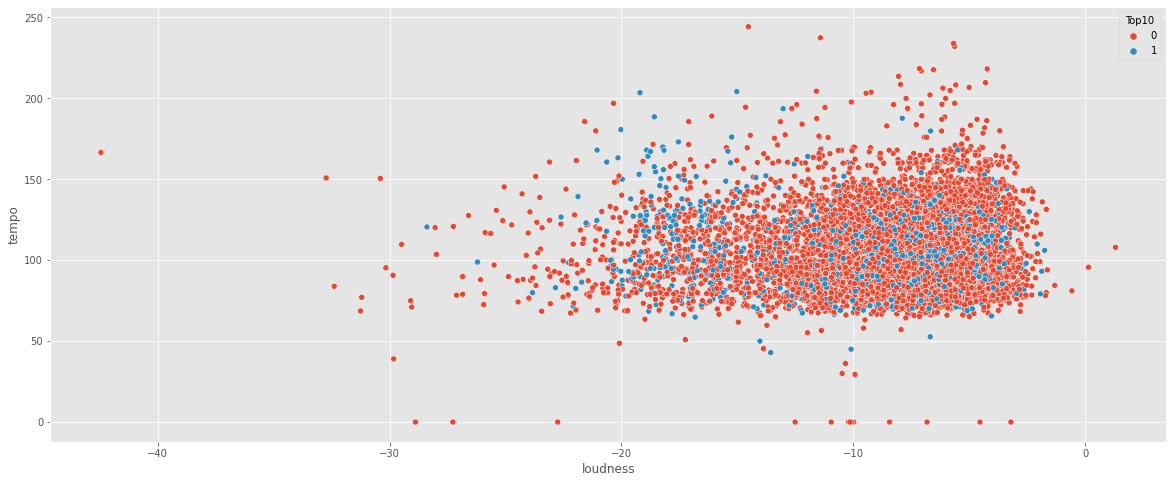

In [ ]:
##Some plots for Data understanding 

plt.rcParams['figure.figsize']=(20,8)
plt.style.use('ggplot')
sns.scatterplot(data = base, x = 'loudness', y = 'tempo', hue = 'Top10')

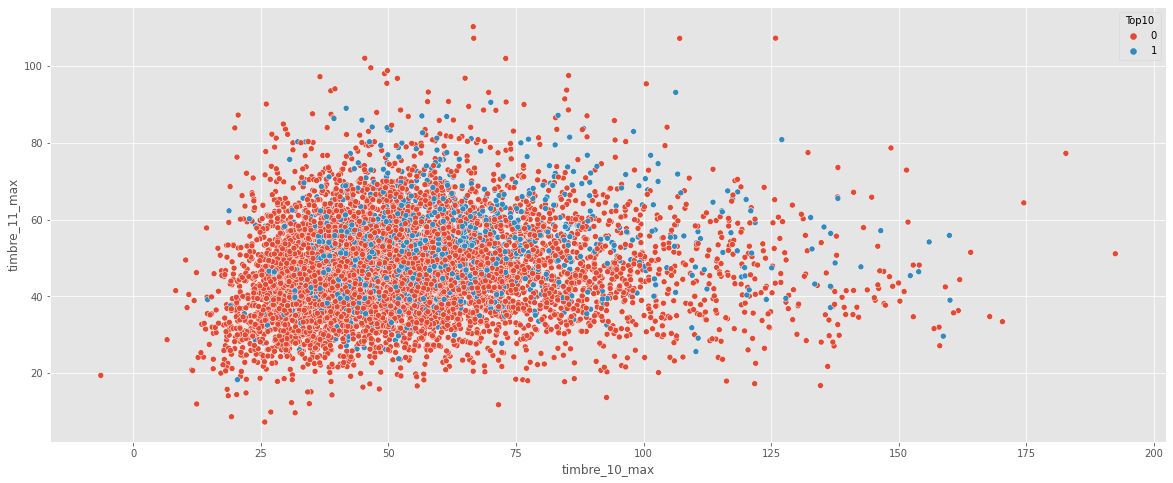

In [ ]:
sns.scatterplot(data = base, x = 'timbre_10_max', y = 'timbre_11_max', hue = 'Top10')

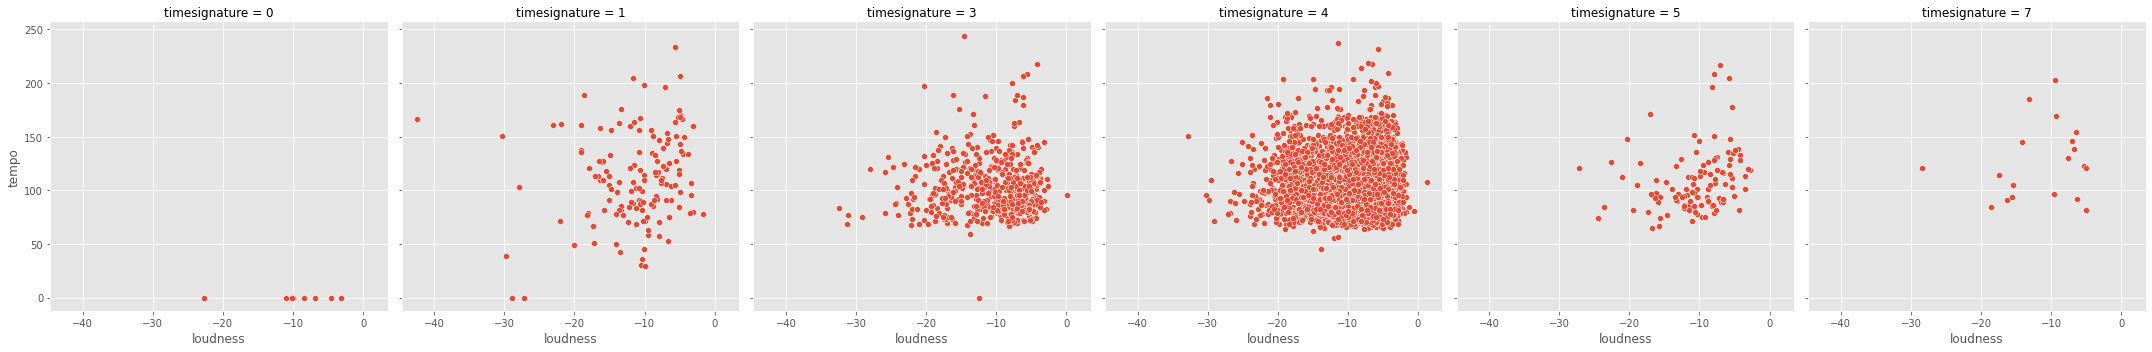

In [ ]:
sns.relplot(data = base, x = 'loudness', y = 'tempo',col = 'timesignature', kind = 'scatter')

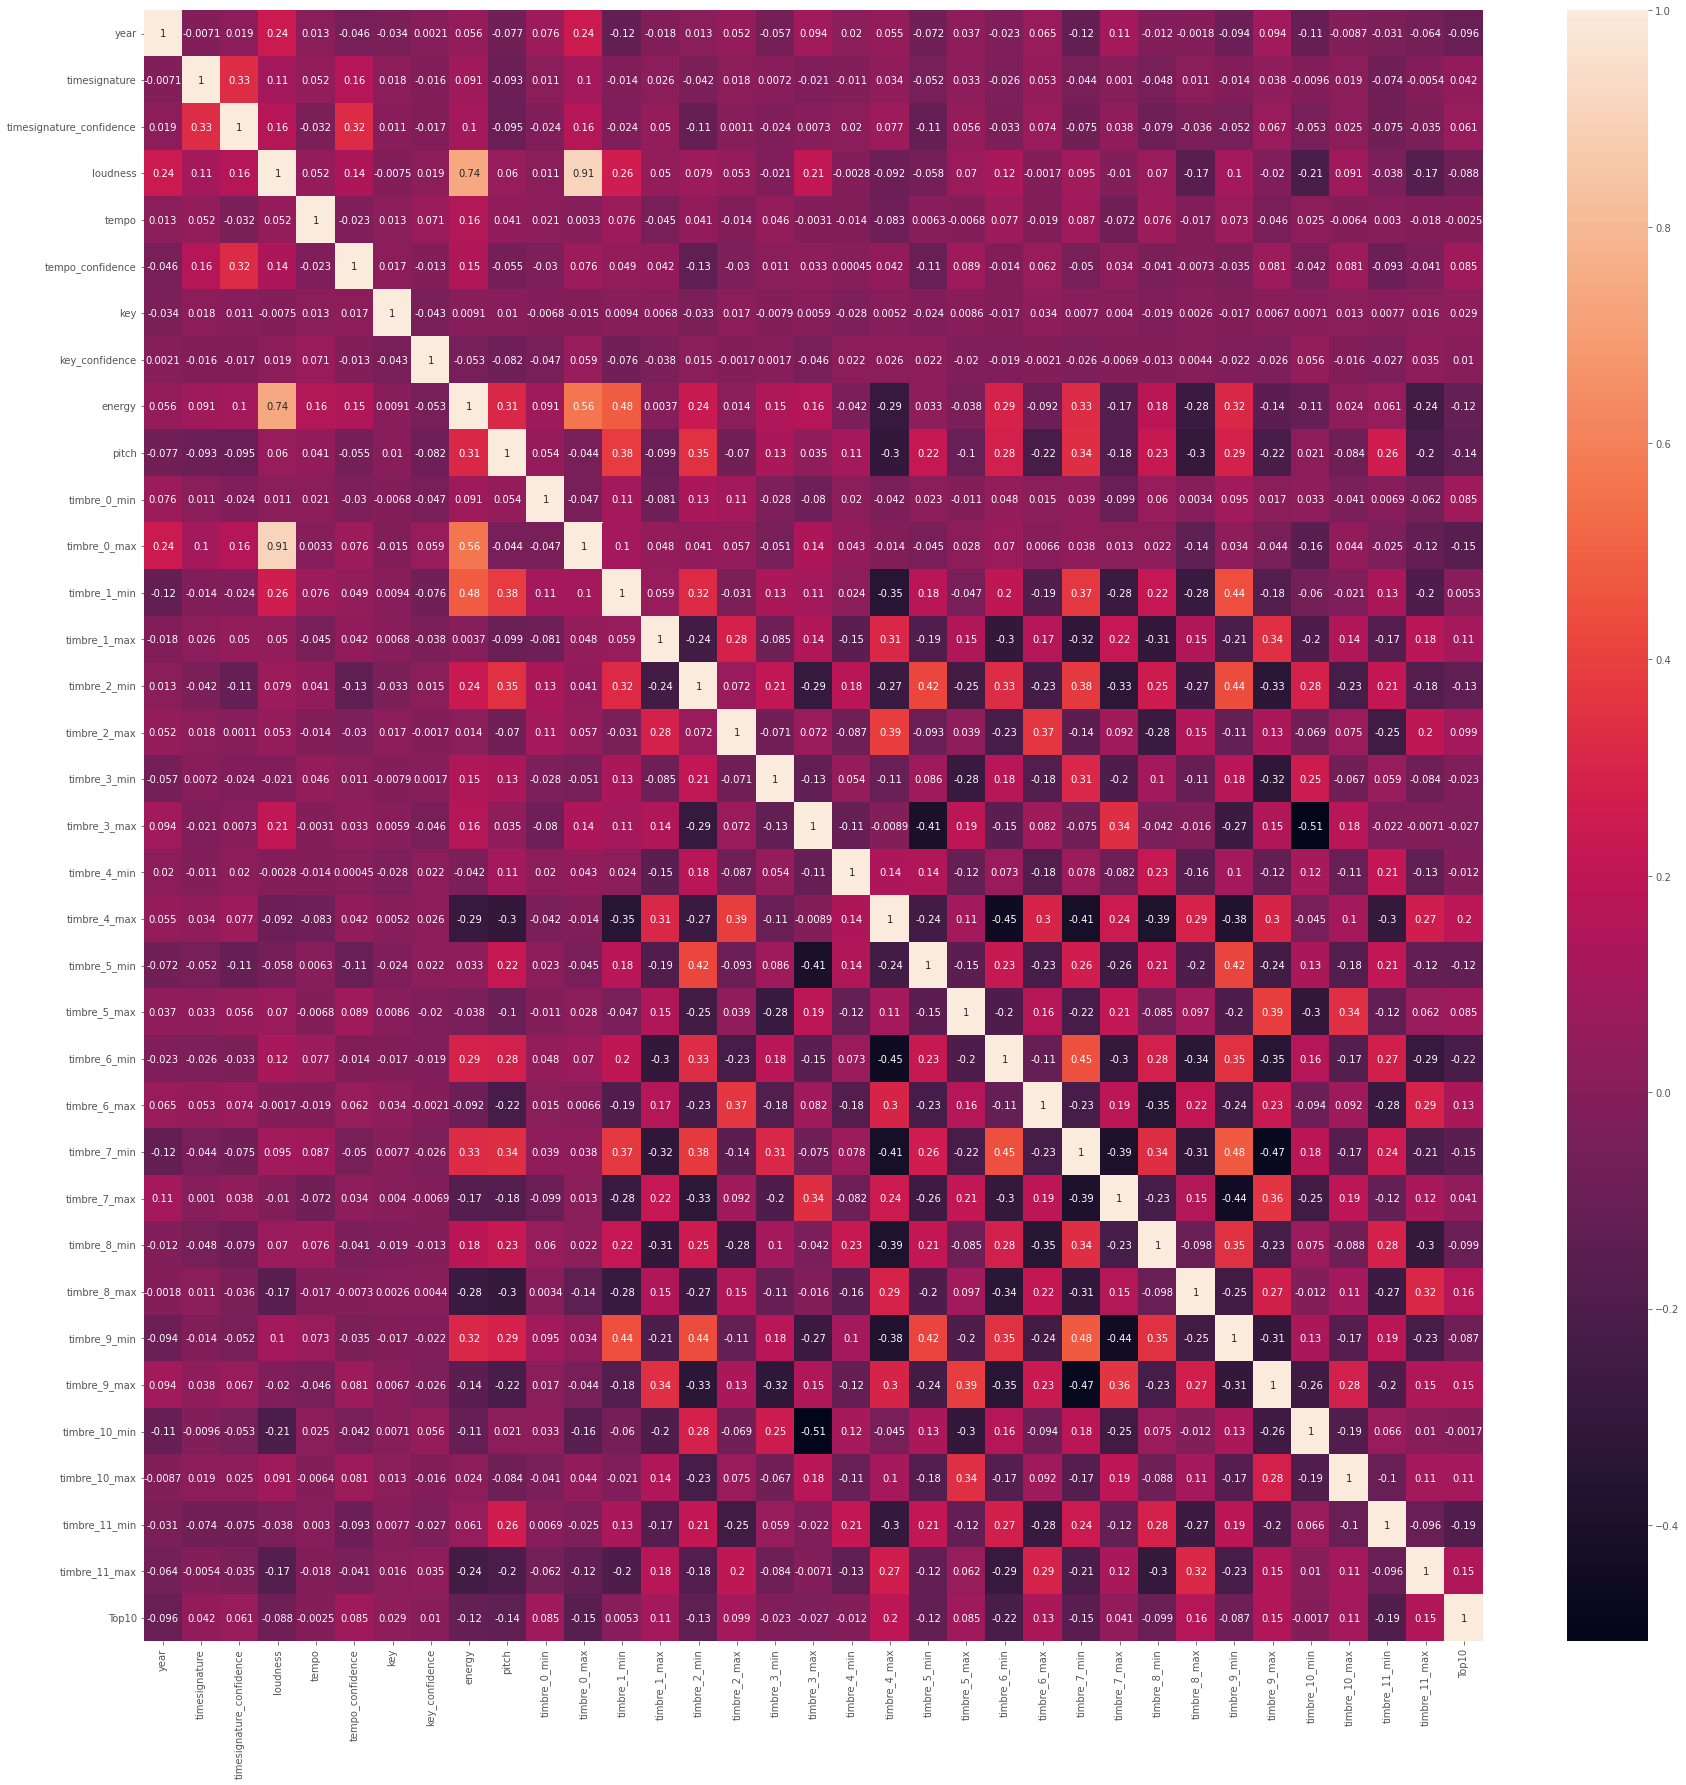

In [ ]:
##GENERATING CORRELATION MATRIX of DATA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.figure(figsize = (30,30))
corr_matrix = base.corr()



sns.heatmap(corr_matrix, annot=True)
plt.show()


#BASIC DATA CLEANING BEFORE RUNNING MY LOGISTIC MODEL


*   First I checked few rows have same SongID and same ArtistID so I droped duplicate ones.
*   Then I created one new variable named as LEVEL in which I combined my SongID and Artist ID to create one unique ID.

*   Then I dropped few columns which I felt not relevant in my model. So I dropped year, song title, song id and artist id. I dropped ID's becoz I already stored them in LEVEL variable.

*   Then I am bad in seeing my DF so I moved my level variable in begining of my Dataframe from last.


*   Then I created Dummies variable because my logistic regression doesn't work on categorical data so I converted them and created close to 1000 dummy variables.

*  Then I checked number of 0's and 1's in my target variable. So I checked just percentage of 0's and 1's in my Data.







In [ ]:
# drop rows which have same songID and artistID
base_data = base.drop_duplicates(subset = ['songID', 'artistID'],keep = 'last').reset_index(drop = True)

In [ ]:
print('Data Shape:',base.shape)
print('New Data Shape:',base_data.shape)

Data Shape: (7574, 39)
New Data Shape: (7549, 39)


In [ ]:
##CLEAN CATEGORICAL DATA BEFORE SPLIT 
base_data["level"] = base_data["songID"] +'_'+base_data["artistID"]
base_data.head(3)

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10,level
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0,SOBGGAB12C5664F054_AROBSHL1187B9AFB01
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0,SOPAQHU1315CD47F31_AROBSHL1187B9AFB01
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0,SOOIZOU1376E7C6386_AROBSHL1187B9AFB01


In [ ]:
# Drop columns which are not required
drop_columns = ['year','songtitle','songID','artistID']
base_data.drop(drop_columns, axis = 1,inplace =True)
base_data.head(3)

,artistname,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,...,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10,level
0,A Day to Remember,3,0.853,-4.262,91.525,0.953,11,0.453,0.966656,0.024,...,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0,SOBGGAB12C5664F054_AROBSHL1187B9AFB01
1,A Day to Remember,4,1.000,-4.051,140.048,0.921,10,0.469,0.984710,0.025,...,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0,SOPAQHU1315CD47F31_AROBSHL1187B9AFB01
2,A Day to Remember,4,1.000,-3.571,160.512,0.489,2,0.209,0.989900,0.026,...,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0,SOOIZOU1376E7C6386_AROBSHL1187B9AFB01


In [ ]:
##JUST MOVING COMBINED ID IN FRONT TO VIEW nothing else 
cols = list(base_data.columns)
cols = [cols[-1]] + cols[:-1]
base_data = base_data[cols]
print('New Data Shape:',base_data.shape)
base_data.head(3)

New Data Shape: (7549, 36)


,level,artistname,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,SOBGGAB12C5664F054_AROBSHL1187B9AFB01,A Day to Remember,3,0.853,-4.262,91.525,0.953,11,0.453,0.966656,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,SOPAQHU1315CD47F31_AROBSHL1187B9AFB01,A Day to Remember,4,1.000,-4.051,140.048,0.921,10,0.469,0.984710,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,SOOIZOU1376E7C6386_AROBSHL1187B9AFB01,A Day to Remember,4,1.000,-3.571,160.512,0.489,2,0.209,0.989900,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0


In [ ]:
###CREATING DUMMIES FOR FEATURE ENGINEERING and tranforming categorical data since my model don't take categorical data
##TOTAL DUMMIES 1065 cols - 36 cols = 1029 dummies cols
artist_name = 'artistname'
num_cols = [c for c in base_data.columns if c not in [artist_name]]

base_data = pd.concat([base_data[num_cols],pd.get_dummies(base_data.artistname)], axis=1)
base_data.head(3)

,level,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,...,Yung Joc,Zebrahead,Zero 7,Zhane,eMC,matchbox twenty,soulDecision,t.A.T.u.,various artists,will.i.am
0,SOBGGAB12C5664F054_AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,11,0.453,0.966656,0.024,...,0,0,0,0,0,0,0,0,0,0
1,SOPAQHU1315CD47F31_AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,10,0.469,0.984710,0.025,...,0,0,0,0,0,0,0,0,0,0
2,SOOIZOU1376E7C6386_AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,2,0.209,0.989900,0.026,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
base_data.drop_duplicates(inplace =True)

In [ ]:
base_data.Top10.value_counts()

0    6438
1    1111
Name: Top10, dtype: int64

In [ ]:
count_no_sub = len(base_data[base_data['Top10']==0])
count_sub = len(base_data[base_data['Top10']==1])

pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of Target 0:", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Target 1:", pct_of_sub*100)

percentage of Target 0: 85.28281891641278
percentage of Target 1: 14.71718108358723


In [ ]:
base_data.isnull().sum()
base_data.dtypes

level                        object
timesignature                 int64
timesignature_confidence    float64
loudness                    float64
tempo                       float64
                             ...   
matchbox twenty               uint8
soulDecision                  uint8
t.A.T.u.                      uint8
various artists               uint8
will.i.am                     uint8
Length: 1065, dtype: object

#SAVING TARGET VARIABLE IN Y and REST IN X 

In [ ]:
##FIT MODEL USING ALL VARIABLES 

import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer


ID_COL , TARGET_COL = 'level','Top10'
features = [c for c in base_data.columns if c not in [ID_COL,TARGET_COL]]

y = base_data["Top10"]
X = base_data[features]


#CREATING ONE COMMON METHOD TO USE EVERYTIME TO FIND MY MODEL ACCURACY AND CONFUSION MATRIX (Reducing code Redundancy)


*   To reduce code redundacy I created a method named print_score




In [ ]:
###METHOD FOR ACCURACY AND ALL 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



#DIVIDING MY DATA IN TEST AND TRAIN

In [ ]:
####TRAINING AND TESTING Spliting 75% training and 25% Testing randomly

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#ANSWER 1  and 2
#CREATING MODEL USING ALL VARIABLES without any Feature Engineering



1.   Running basic Logistic regression model first without any regularization and solver.



In [ ]:
##CHECKING AND RUNNING MODEL 

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression() 
lr_clf.fit(X_train, y_train)

##ANSWER NUMBER 2 
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 85.78%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.869821    0.573913  0.857799     0.721867      0.825966
recall        0.979676    0.157330  0.857799     0.568503      0.857799
f1-score      0.921486    0.246960  0.857799     0.584223      0.821517
support    4822.000000  839.000000  0.857799  5661.000000   5661.000000
_______________________________________________
Confusion Matrix: 
 [[4724   98]
 [ 707  132]]

Test Result:
Accuracy Score: 86.39%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.872737    0.615385  0.863877     0.744061      0.835661
recall        0.984530    0.147059  0.863877     0.565794      0.863877
f1-score      0.925269    0.237389  0.863877     0.581329      0.826168
support    1616.000000  272.000000  0.863

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#ANSWER 3
#GENERATING ROC CURVE 

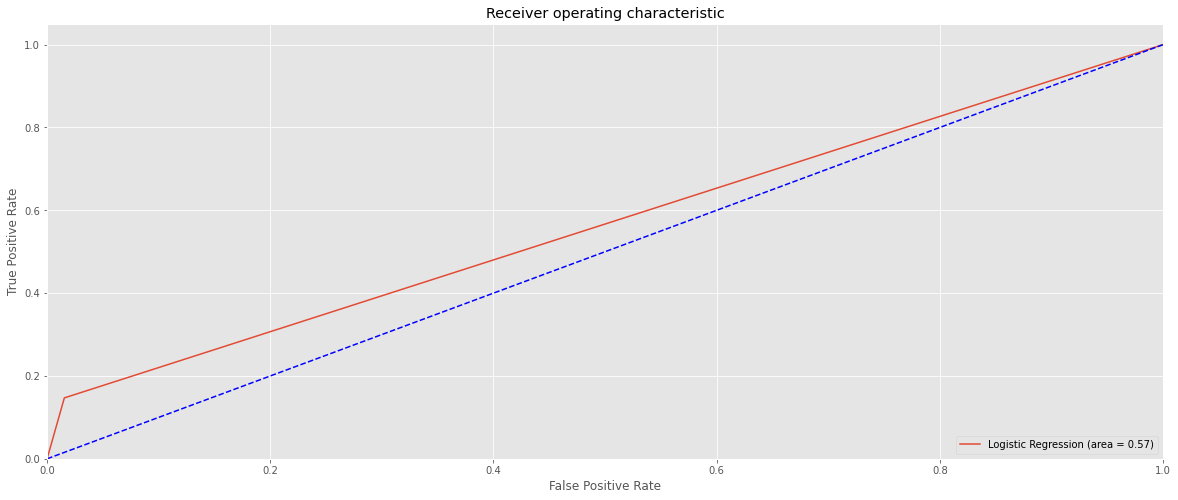

In [ ]:
###GENERATING ROC CURVE 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
    
logit_roc_auc = roc_auc_score(y_test, lr_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



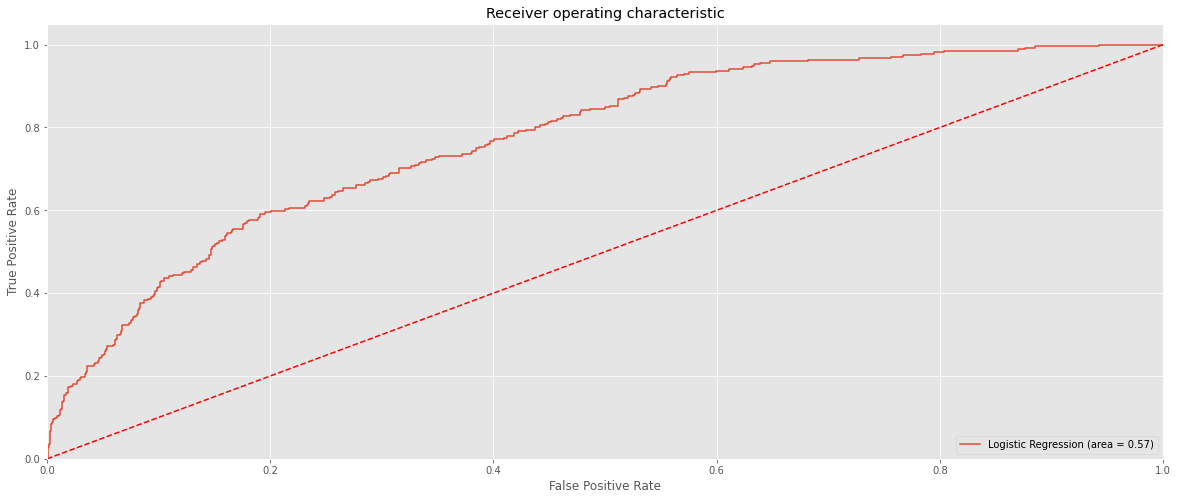

In [ ]:
##GENERATING ROC CURVE OF PROBABILITY ONE 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lr_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#ANSWER 4
#NOW DOING SCALING AND REGULARIZATION TO IMPROVE MY MODEL
#MODEL ACCURACY IMPROVED FROM 86% to 97%


*   Trying all possible ways to improve my MODEL


In [ ]:
# DOING SCALING and PCA

num_columns = features

ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


In [ ]:
X_train.shape


(5661, 2126)

In [ ]:
##CHECKING AND RUNNING MODEL after SCALING 
#DOING L1 regularization first

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear',penalty = 'l1')  # doing L1 and checking
lr_clf.fit(X_train, y_train)

##Testing Accuracy and Printing Confusion matrix
print("CHECKING SCORE ACCURACY WITH L1 REGULARIZATION")
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

CHECKING SCORE ACCURACY WITH L1 REGULARIZATION
Train Result:
Accuracy Score: 97.40%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.977138    0.954068  0.974033     0.965603      0.973719
recall        0.992742    0.866508  0.974033     0.929625      0.974033
f1-score      0.984878    0.908182  0.974033     0.946530      0.973511
support    4822.000000  839.000000  0.974033  5661.000000   5661.000000
_______________________________________________
Confusion Matrix: 
 [[4787   35]
 [ 112  727]]

Test Result:
Accuracy Score: 91.58%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.917479    0.895105  0.915784     0.906292      0.914255
recall        0.990718    0.470588  0.915784     0.730653      0.915784
f1-score      0.952693    0.616867  0.915784     0.784780      0.9

In [ ]:
##CHECKING AND RUNNING MODEL after SCALING 
#DOING L2 regularization 

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear',penalty = 'l2')  # Checking RESULT WITH L2 regularization
lr_clf.fit(X_train, y_train)

##Testing Accuracy and Printing Confusion matrix
print("CHECKING SCORE ACCURACY WITH L2 REGULARIZATION")
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

CHECKING SCORE ACCURACY WITH L2 REGULARIZATION
Train Result:
Accuracy Score: 97.40%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.977333    0.952880  0.974033     0.965106      0.973709
recall        0.992534    0.867700  0.974033     0.930117      0.974033
f1-score      0.984875    0.908297  0.974033     0.946586      0.973526
support    4822.000000  839.000000  0.974033  5661.000000   5661.000000
_______________________________________________
Confusion Matrix: 
 [[4786   36]
 [ 111  728]]

Test Result:
Accuracy Score: 91.74%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.919059    0.897260  0.917373     0.908159      0.915918
recall        0.990718    0.481618  0.917373     0.736168      0.917373
f1-score      0.953544    0.626794  0.917373     0.790169      0.9

Understanding Confusion Matrix Result 
Sensitivity = True positive/ actual positive = 1601/1601 + 141 = 1601/1742 



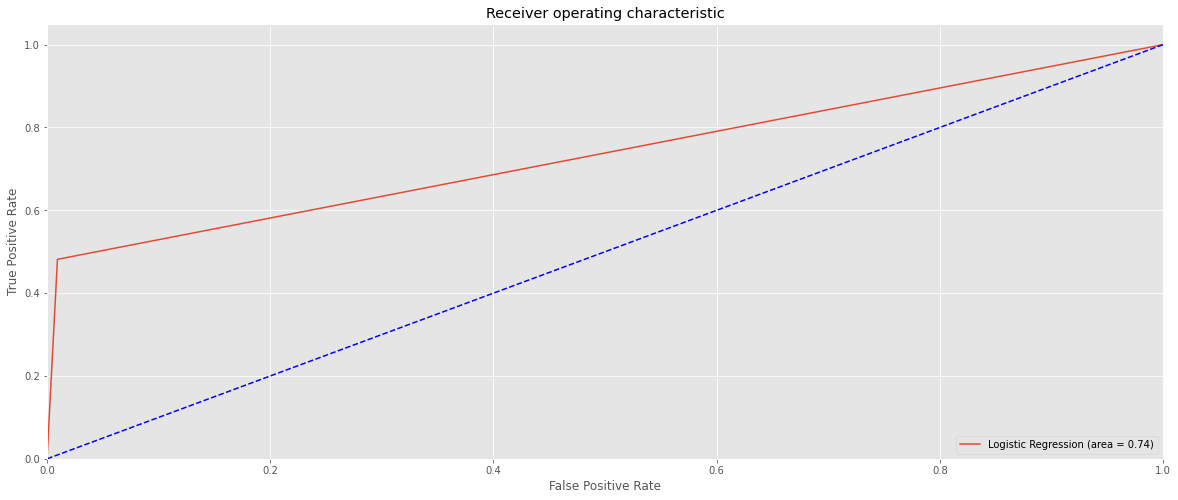

In [ ]:
###GENERATING ROC CURVE AGAIN
from sklearn.metrics import roc_curve
    
logit_roc_auc = roc_auc_score(y_test, lr_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#IMPLEMENTING RFE TECHNIQUE TO SEE MODEL PERFORMANCE



In [ ]:
## RFE for feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

logreg = LogisticRegression(solver='liblinear',penalty='l2')
rfe = RFE(estimator = logreg, n_features_to_select=200, step=1,verbose = 2)

ID_COL , TARGET_COL = 'level','Top10'
features = [c for c in base_data.columns if c not in [ID_COL,TARGET_COL]]

y = scaler.fit_transform(pd.DataFrame(base_data["Top10"]))
X = scaler.fit_transform(base_data[features])

rfe = rfe.fit(X, y.ravel())
filter = rfe.support_
ranking = rfe.ranking_

print("Mask data: ", filter)
print("Ranking: ", ranking)

Fitting estimator with 1063 features.
Fitting estimator with 1062 features.
Fitting estimator with 1061 features.
Fitting estimator with 1060 features.
Fitting estimator with 1059 features.
Fitting estimator with 1058 features.
Fitting estimator with 1057 features.
Fitting estimator with 1056 features.
Fitting estimator with 1055 features.
Fitting estimator with 1054 features.
Fitting estimator with 1053 features.
Fitting estimator with 1052 features.
Fitting estimator with 1051 features.
Fitting estimator with 1050 features.
Fitting estimator with 1049 features.
Fitting estimator with 1048 features.
Fitting estimator with 1047 features.
Fitting estimator with 1046 features.
Fitting estimator with 1045 features.
Fitting estimator with 1044 features.
Fitting estimator with 1043 features.
Fitting estimator with 1042 features.
Fitting estimator with 1041 features.
Fitting estimator with 1040 features.
Fitting estimator with 1039 features.
Fitting estimator with 1038 features.
Fitting esti

In [ ]:
## PRINTING FEATURES
feature = array(features)
print("All features:")
print(feature)

print("Selected features:")
print(feature[filter])

All features:
['timesignature' 'timesignature_confidence' 'loudness' ... 't.A.T.u.'
 'various artists' 'will.i.am']
Selected features:
['timesignature' 'loudness' 'pitch' 'timbre_0_min' 'timbre_0_max'
 'timbre_1_min' 'timbre_2_min' 'timbre_3_max' 'timbre_4_min'
 'timbre_4_max' 'timbre_5_min' 'timbre_6_min' 'timbre_6_max'
 'timbre_7_min' 'timbre_8_max' 'timbre_10_max' 'timbre_11_min'
 'timbre_11_max' '50 Cent' '98 Degrees' 'Alicia Keys' 'All-4-One'
 'Amy Grant' 'Angie Martinez' 'Ashanti' 'B.o.B' 'Baby Bash' 'Babyface'
 'Backstreet Boys' 'Beenie Man' 'Beyonce' 'Billy Joel' 'Bizzy Bone'
 'Black Box' 'Bobby Brown' 'Bon Jovi' 'Bone Thugs-N-Harmony'
 'Bone Thugs-n-Harmony' 'Brandy' 'Britney Spears' 'Brooks & Dunn'
 'Bryan Adams' 'Busta Rhymes' 'Candy Butchers' 'Carly Simon'
 'Carrie Underwood' 'Celine Dion' 'Cex' 'Cher' 'Chingy' 'Chris Brown'
 'Chrisette Michele' 'Christina Aguilera' 'Ciara' 'Clay Aiken'
 'Cornershop' 'Creed' 'Crime Mob' 'Daughtry' 'Dave Matthews Band'
 'David Byrne' 'Daz Di

#SELECTING top 200 Features for MODEL and check

In [ ]:
import statsmodels.api as sm

cols = ['timesignature' ,'loudness', 'pitch', 'timbre_0_min', 'timbre_0_max','timbre_1_min', 'timbre_2_min', 'timbre_3_max' ,'timbre_4_min',
 'timbre_4_max', 'timbre_5_min', 'timbre_6_min', 'timbre_6_max',
 'timbre_7_min', 'timbre_8_max' ,'timbre_10_max' ,'timbre_11_min',
 'timbre_11_max', '50 Cent', '98 Degrees', 'Alicia Keys', 'All-4-One',
 'Amy Grant', 'Angie Martinez', 'Ashanti' ,'B.o.B', 'Baby Bash', 'Babyface',
 'Backstreet Boys', 'Beenie Man' ,'Beyonce', 'Billy Joel', 'Bizzy Bone',
 'Black Box' ,'Bobby Brown' ,'Bon Jovi' ,'Bone Thugs-N-Harmony',
 'Bone Thugs-n-Harmony' ,'Brandy' ,'Britney Spears', 'Brooks & Dunn',
 'Bryan Adams' ,'Busta Rhymes', 'Candy Butchers', 'Carly Simon',
 'Carrie Underwood' ,'Celine Dion' ,'Cex' ,'Cher' ,'Chingy', 'Chris Brown',
 'Chrisette Michele' ,'Christina Aguilera' ,'Ciara' ,'Clay Aiken',
 'Cornershop' ,'Creed', 'Crime Mob' ,'Daughtry', 'Dave Matthews Band',
 'David Byrne', 'Daz Dillinger', 'Deep Forest' ,'Dixie Chicks', 'Dr. Dooom',
 'Drake' ,'Duran Duran', 'Eels' ,'Enigma', 'Enrique Iglesias' ,'Evanescence',
 'Fabolous', 'Family Force 5' ,'Fergie' ,'Firehouse',
 'Flight of the Conchords' ,'Flo Rida' ,'Gabrielle', 'George Michael',
 'Glee Cast', 'Gloria Estefan', 'Goo Goo Dolls' ,'Gorilla Zoe' ,'Green Day',
 'Gwen Stefani', 'Hootie & The Blowfish', 'INXS' ,'Imogen Heap', 'India.Arie',
 'Infectious Grooves', 'Ja Rule', 'Jaheim', 'Janet' ,'Janet Jackson',
 'Jay Sean', 'Jeff Beck' ,'Jon Secada' ,'Jonas Brothers', 'Justin Timberlake',
 'Kanye West', 'Katy Perry', 'Ke$ha', 'Kelly Clarkson', 'Kidz Bop Kids',
 'Killah Priest', 'Kurupt' ,'Lady GaGa' ,'Lady Gaga' ,'Lil Scrappy',
 'Lil Wayne' ,'Limp Bizkit', 'Lionel Richie' ,'Lyfe Jennings', 'Madonna',
 'Marc Anthony' ,'Mariah Carey' ,'Mario' ,'Mary J. Blige' ,'Michael Bolton',
 'Mike Jones' ,'Miley Cyrus', 'Monica', 'Montell Jordan', 'Mystic', 'Nadine',
 'Natasha Bedingfield', 'Naughty By Nature', 'Ne-Yo' ,'Nelly Furtado',
 'New Kids On The Block' ,'Nickelback', 'No Doubt' ,'O.A.R.', 'Onyx' ,'OutKast',
 'Outlawz' ,'Pete Townshend' ,'Phil Collins' ,'Poe', 'Powerman 5000',
 'Prefuse 73', 'Queen Latifah', 'R. Kelly' ,'R.E.M.', 'RZA' ,'Rascal Flatts',
 'Real McCoy', 'Rihanna' ,'Rod Stewart', 'Roxette', 'Sade' ,'Sarah McLachlan',
 'Savage Garden' ,'Sean Kingston' ,'Selena', 'Shania Twain', 'Sheryl Crow',
 'Shwayze' ,'Silkk the Shocker' ,'Snap' ,'Snoop Dogg' ,'Soul II Soul',
 'Spice Girls' ,'Styles', 'T-Pain', 'T.I.' ,'TLC' ,'Taio Cruz', 'Taylor Dayne',
 'Taylor Swift', 'Technotronic' ,'Tesla' ,'The All-American Rejects',
 'The Carpenters' ,'The Fray' ,'The Juan MacLean', 'The Notorious B.I.G.'
 ,'The Police', 'The Pussycat Dolls' ,'The Residents' ,'The Roots',
 'The Streets' ,'Timbaland' ,'Toni Braxton', 'Tori Amos', 'Twista',
 "Umphrey's McGee" ,'Uncle Kracker', 'Utada' ,'Various Artists',
 'Various artists' ,'Will Smith', 'Wilson Phillips', 'Wyclef Jean', 'XTC',
 'Xscape' ,'Yes', 'eMC' ,'matchbox twenty' ,'will.i.am']     
      
X=base_data[cols]
y=base_data["Top10"]

logit_model=sm.Logit(y,X)
result= logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.319494
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 45
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.235      
Dependent Variable:    Top10              AIC:                5223.7248  
Date:                  2022-05-13 07:27   BIC:                6609.5589  
No. Observations:      7549               Log-Likelihood:     -2411.9    
Df Model:              199                LL-Null:            -3153.8    
Df Residuals:          7349               LLR p-value:        4.1429e-195
Converged:             0.0000             Scale:              1.0000     
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
timesignature             0.2990   0.0783   3.8201 0.0001  0.1456  0.4523
loudness

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


#MODEL TRAINING with RFE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
from statsmodels.base.model import Model
#Let’s split X and y using Train test split after doing RFE
X_train_RFE,X_test_RFE,y_train_RFE,y_test_RFE = train_test_split(X,y,random_state=42,test_size=0.25)

#get shape of train and test data
print("train size X : ",X_train_RFE.shape)
print("train size y : ",y_train_RFE.shape)
print("test size X : ",X_test_RFE.shape)
print("test size y : ",y_test_RFE.shape)

logreg = LogisticRegression(solver='liblinear',penalty='l2')
logreg.fit(X_train_RFE, y_train_RFE)

train size X :  (5661, 200)
train size y :  (5661,)
test size X :  (1888, 200)
test size y :  (1888,)


LogisticRegression(solver='liblinear')

In [ ]:
#ACCURACY ON TEST DATA

y_pred_RFE = logreg.predict(X_test_RFE)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_RFE, y_test_RFE)))

Accuracy of logistic regression classifier on test set: 0.89


In [ ]:
##PRINTING CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_RFE, y_pred_RFE)
print(confusion_matrix)

[[1603   13]
 [ 186   86]]


Understanding Confusion Matrix Result 
Sensitivity = True positive/ actual positive = 1603/1603 + 186 = 1603/1792  = 89.4%

specificity = 13/13+86 = 13/99 = 13.3%

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_RFE, y_pred_RFE))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1616
           1       0.87      0.32      0.46       272

    accuracy                           0.89      1888
   macro avg       0.88      0.65      0.70      1888
weighted avg       0.89      0.89      0.87      1888



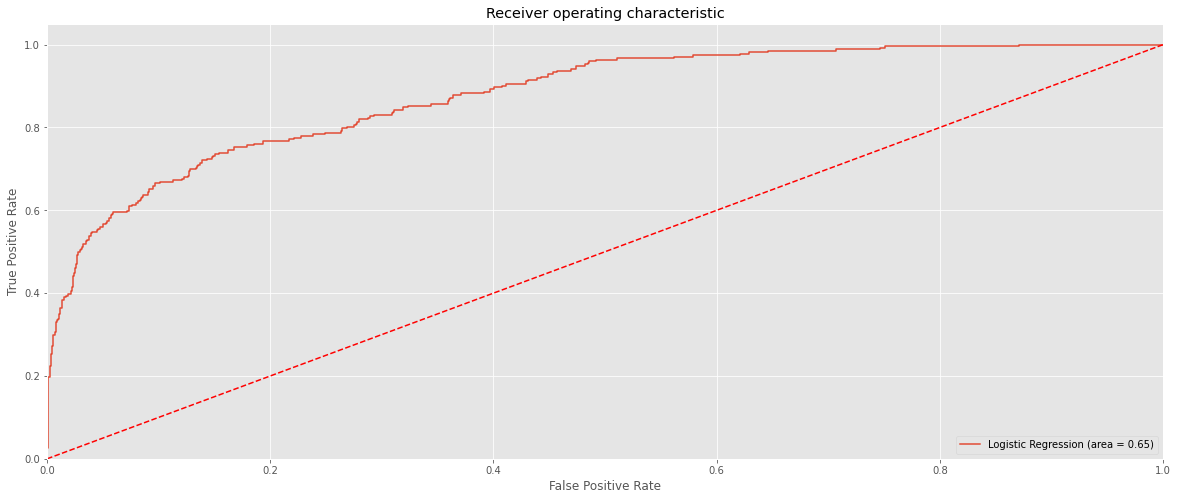

In [ ]:
###GENERATING ROC CURVE AGAIN
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_RFE, logreg.predict(X_test_RFE))
fpr, tpr, thresholds = roc_curve(y_test_RFE, logreg.predict_proba(X_test_RFE)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ANSWER 5
Finally ANALYZING COEFICIENT OF THIS MODEL.

In [ ]:
logit_model=sm.Logit(y,X)
result= logit_model.fit(method='bfgs')
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.338252
         Iterations: 35
         Function evaluations: 51
         Gradient evaluations: 46


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                          Results: Logit
Model:                         Logit                       Pseudo R-squared:            0.190     
Dependent Variable:            Top10                       AIC:                         7232.9333 
Date:                          2022-05-13 07:55            BIC:                         14598.6414
No. Observations:              7549                        Log-Likelihood:              -2553.5   
Df Model:                      1062                        LL-Null:                     -3153.8   
Df Residuals:                  6486                        LLR p-value:                 0.0018677 
Converged:                     0.0000                      Scale:                       1.0000    
--------------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------

#TAKING FIVE COEFICIENT FROM ABOVE LIST TO UNDERSTAND THEM
#TAKING ONLY THOSE WHOSE P-value is less than 0.005. Because anything above 0.05 doesn't belong to my model because I assumed my alpha 5%.


                       COEFICIENT VALUE              P-VALUE

timesignature           0.2061                     0.0192



---



timbre_0_min               0.0228                0.0000 




---


timbre_0_max               0.1398               0.0000  



---



timbre_1_min               0.0055                0.0000 


---




timbre_4_min              0.0085                 0.0001 


                

#ANSWER 5

#EXPLAINING 5 COEFICIENTS

1) Timesignature have coeficient value of positive 0.2061 which tells us the value of Beta and exponential power of Beta gives us odds ratio. which is e^0.2061 = 1.22 my Odds ratio.

So we can say 1.22 - 1 = 0.22. Hence 22%.

2) timbre_0_min have coeficient value of positive 0.0228 which tells us the value of Beta and exponential power of Beta gives us odd ratio. which is e^0.0228 = 1.02

So we can say  1.02 - 1= 0.02. Hence, 2%

3) timbre_0_max have coeficient value of positive 0.1398  which tells us the value of Beta and exponential power of Beta gives us odd ratio. which is e^0.1398 = 1.15 

So we can say 1.15 - 1 = 0.15. Hence, 15%


4) timbre_1_min  have coeficient value of positive 0.0055  which tells us the value of Beta and exponential power of Beta gives us odd ratio. which is e^0.0055 = 1.0055

So we can say 1.0055 - 1 = 0.0055. Hence, 0.55%

5) timbre_4_min  have coeficient value of positive 0.0085  which tells us the value of Beta and exponential power of Beta gives us odd ratio. which is e^0.0085 = 1.0085

So we can say 1.0085 - 1 = 0.0085. Hence, 0.85%
               


#My MODEL WORKS BEST WITH L2 REGULARIZATION AND GIVING 91.74% accuracy on Test Data while after performing RFE technique I am getting 89% of accuracy on Test Data.

